IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel,SelectKBest, chi2
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import LinearSVC

IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# READING THE DATA
ds=pd.read_csv('/content/drive/MyDrive/csv_result-chronic_kidney_disease.csv')

In [ ]:
# DISPLAYING FIRST FEW ROWS OF THE DATASET
ds.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# DISPLAYING THE SHAPE OF THE DATASET
ds.shape

(400, 26)

In [ ]:
# DISPLAYING THE INFORMATION ABOUT THE DATASET
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   age     400 non-null    object
 2   bp      400 non-null    object
 3   sg      400 non-null    object
 4   al      400 non-null    object
 5   su      400 non-null    object
 6   rbc     400 non-null    object
 7   pc      400 non-null    object
 8   pcc     400 non-null    object
 9   ba      400 non-null    object
 10  bgr     400 non-null    object
 11  bu      400 non-null    object
 12  sc      400 non-null    object
 13  sod     400 non-null    object
 14  pot     400 non-null    object
 15  hemo    400 non-null    object
 16  pcv     400 non-null    object
 17  wbcc    400 non-null    object
 18  rbcc    400 non-null    object
 19  htn     400 non-null    object
 20  dm      399 non-null    object
 21  cad     400 non-null    object
 22  appet   400 non-null    ob

DATA PREPROCESSING

In [ ]:
# DROPPING THE ID COLUMN
ds=ds.drop('id',axis=1)

In [ ]:
# CONVERTING '?' TO NULL TYPE
ds.replace('?',np.nan,inplace=True)

In [ ]:
# CONVERTING NUMERICAL COLUMNS TO NUMERIC DATA TYPE
columns_to_convert=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
ds[columns_to_convert] = ds[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# IDENTIFYING CATEGORICAL COLUMNS
categorical_columns=ds.select_dtypes(include=object).columns
print(categorical_columns)

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'class'],
      dtype='object')


In [ ]:
# DISPLAYING DIFFERENT VALUES TAKEN BY EACH CATEGORICAL VARIABLES
for each in categorical_columns:
  print(each)
  print(ds[each].value_counts(),'\n')

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64 

pc
normal      259
abnormal     76
Name: pc, dtype: int64 

pcc
notpresent    354
present        42
Name: pcc, dtype: int64 

ba
notpresent    374
present        22
Name: ba, dtype: int64 

htn
no     251
yes    147
Name: htn, dtype: int64 

dm
no     260
yes    137
Name: dm, dtype: int64 

cad
no     364
yes     34
Name: cad, dtype: int64 

appet
good    316
poor     82
no        1
Name: appet, dtype: int64 

pe
no      322
yes      76
good      1
Name: pe, dtype: int64 

ane
no     339
yes     60
Name: ane, dtype: int64 

class
ckd       250
notckd    150
Name: class, dtype: int64 



In [ ]:
# ENCODING CATEGORICAL VARIABLES
dict={'normal':1,'abnormal':0,'present':1,'notpresent':0,'good':1,'poor':0,'yes':1,'no':0}
ds[categorical_columns]=ds[categorical_columns].replace(dict)
ds.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,ckd


In [ ]:
# ENCODING THE TARGET VARIABLE
ds['class']=ds['class'].map({'ckd':1,'notckd':0})

In [ ]:
# COUNT OF MISSING VALUES
ds.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

IMPUTING MISSING VALUES

In [ ]:
# KNN IMPUTATION FOR MISSING VALUES
from sklearn.impute import KNNImputer
knnImp=KNNImputer(n_neighbors=3)
knnImp_ds=pd.DataFrame(knnImp.fit_transform(ds),columns=ds.columns)

In [ ]:
# COUNT OF MISSING VALUES IN KNN IMPUTED DATASET
knnImp_ds.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
# ITERATIVE IMPUTER FOR MISSING VALUES
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer(estimator=RandomForestRegressor(),random_state=0)
itImp_ds=pd.DataFrame(imputer.fit_transform(ds),columns=ds.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# COUNT OF MISSING VALUES IN ITERATIVE IMPUTED DATASET
itImp_ds.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
# MICE FOREST IMPUTATION FOR MISSING VALUES
! pip install miceforest --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 265.9 MB/s eta 0:00:00


In [ ]:
import miceforest as mf
kernel= mf.ImputationKernel(ds,save_all_iterations=True,random_state=10)
kernel.mice(2)
mf_ds= kernel.complete_data()

mf_ds.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

DATA VISUALISATION

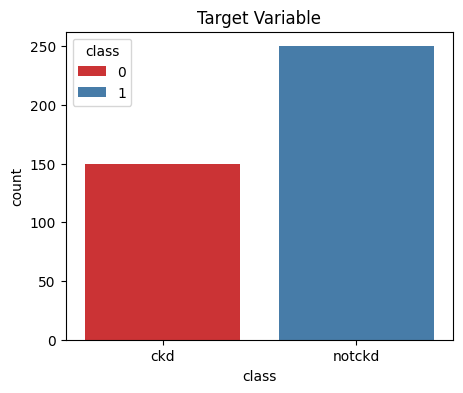

In [ ]:
# OCCURENCE OF THE TARGET VARIABLE
plt.figure(figsize=(5,4))
sns.countplot(x='class',data=ds,hue='class',palette='Set1')
plt.title('Target Variable')
plt.xticks([0,1],['ckd','notckd'])
plt.show()

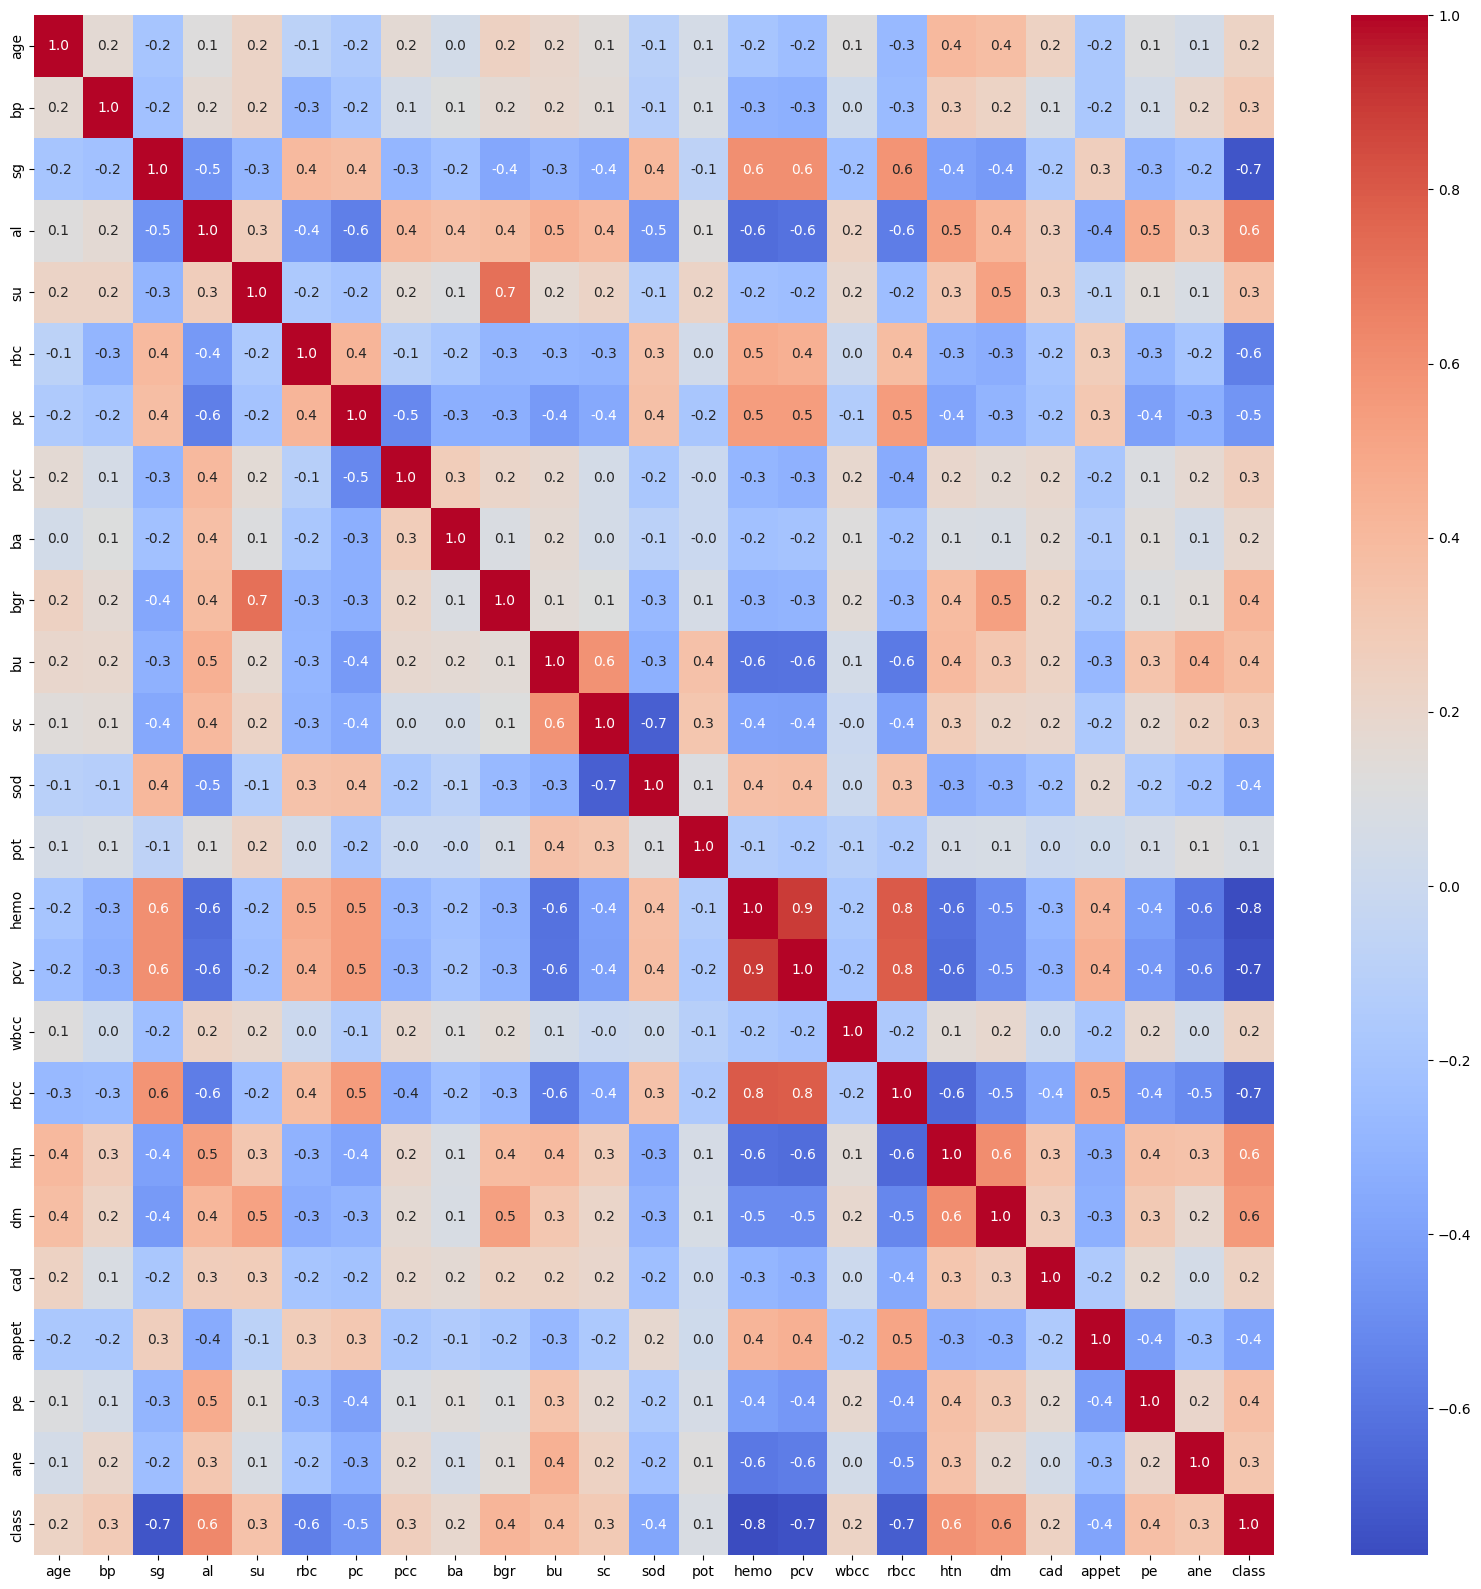

In [ ]:
# CORRELATION MATRIX
plt.figure(figsize=(20,20))
data=ds.corr()
sns.heatmap(data=data, annot = True,fmt='.1f',cmap='coolwarm')
plt.show()

In [ ]:
ds.corr()[['class']].style.background_gradient(cmap='BuGn')

,class
age,0.227268
bp,0.294077
sg,-0.732163
al,0.627090
su,0.344070
rbc,-0.555097
pc,-0.461812
pcc,0.263226
ba,0.185345
bgr,0.419672


FEATURE SCALING


In [ ]:
# FUNCTION FOR NORMALISATION OF VARIABLES
def feature_scaling(x):
  xcol=x.columns
  sc=StandardScaler()
  x=pd.DataFrame(sc.fit_transform(x),columns=xcol)
  return x

FEATURE SELECTION

In [ ]:
# FUNCTION FOR FEATURE SELECTION
def feature_selection(x,y,classifier_name,classifier):
  selector = SelectFromModel(Lasso(alpha=0.1))
  x_selected = pd.DataFrame(selector.fit_transform(x, y), columns=x.columns[selector.get_support(indices=True)])
  return x_selected

OPTIMAL TRAIN-TEST SPLIT

In [ ]:
# FUNCTION TO FIND THE OPTIMAL TRAIN-TEST SPLIT RATIO
def find_optimal_split(x,y,classifier,splitting_ratios):
  optimal_ratio=None
  max_accuracy = 0.0
  for test_ratio in splitting_ratios:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_ratio,random_state=42)
    accuracy = model_performance(x_train,x_test,y_train,y_test,classifier)
    if accuracy> max_accuracy:
      max_accuracy = accuracy
      optimal_ratio = round(test_ratio,2)
  return optimal_ratio

In [ ]:
# FUNCTION TO FIT THE MODEL AND CALCULATE IT'S PERFORMANCE
def model_performance(x_train,x_test,y_train,y_test,classifier):
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)

  accuracy=accuracy_score(y_test,y_pred)

  return accuracy

In [ ]:
# DATA PROCESSING AND MODEL BUILDING FOR EACH DATASET
def model_building(datasets,classifiers,splitting_ratios):
  row1=[]
  acc=[]

  for df_name,df in datasets.items():
    row=[]
    acc_row=[]
    print("\nDataframe:",df_name,"\n")

# SPLITTING OF INDEPENDENT AND DEPENDENT COLUMNS
    x=df.drop('class',axis=1)
    y=df['class']

# FEATURE SCALING
    x=feature_scaling(x)

# FEATURE SELECTION AND OPTIMAL TEST RATIO SPLIT
    for classifier_name, classifier in classifiers.items():
      x_selected=feature_selection(x,y,classifier_name,classifier)
      test_ratio=find_optimal_split(x,y,classifier,splitting_ratios)
      row.append(test_ratio)
      x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=test_ratio, random_state=42)
      accuracy=model_performance(x_train, x_test, y_train, y_test,classifier)
      acc_row.append(accuracy)
    print("Selected features:",x_selected.columns)

    row1.append(row)
    acc.append(acc_row)

  opt_df=pd.DataFrame(row1,index=datasets.keys(),columns=classifiers.keys())
  output=pd.DataFrame(acc,index=datasets.keys(),columns=classifiers.keys())

  return opt_df,output

In [ ]:
datasets={"KNN imputed":knnImp_ds,"Iterative imputed":itImp_ds,"Mice forest":mf_ds}
classifiers={"Logistic regression":LogisticRegression(),\
             "Decision Tree":DecisionTreeClassifier(),
             "Random Forest":RandomForestClassifier(),
             "Support vector":LinearSVC()}
splitting_ratios = np.linspace(0.2,0.5,4)

opt_df,output=model_building(datasets,classifiers,splitting_ratios)


Dataframe: KNN imputed 

Selected features: Index(['sg', 'al', 'rbc', 'hemo', 'htn', 'dm'], dtype='object')

Dataframe: Iterative imputed 

Selected features: Index(['sg', 'al', 'rbc', 'hemo', 'pcv', 'htn', 'dm'], dtype='object')

Dataframe: Mice forest 

Selected features: Index(['sg', 'al', 'rbc', 'hemo', 'pcv', 'htn', 'dm'], dtype='object')


MODEL BUILDING

In [ ]:
# DIFFERENT MODEL BUILDING
acc_data=[]

for df_name,df in datasets.items():
    accuracy_row=[]

# SPLITTING OF INDEPENDENT AND DEPENDENT COLUMNS
    x=df.drop('class',axis=1)
    y=df['class']

# FEATURE SELECTION AND MODEL BUILDING
    for classifier_name, classifier in classifiers.items():
      x_selected=feature_selection(x,y,classifier_name,classifier)
      x_scaled=feature_scaling(x_selected)
      x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
      accuracy=model_performance(x_train, x_test, y_train, y_test,classifier)
      accuracy_row.append(accuracy)

    acc_data.append(accuracy_row)

accuracy_table=pd.DataFrame(acc_data,index=datasets.keys(),columns=classifiers.keys())

RESULTS

In [ ]:
# TABLE OF OPTIMAL TRAIN-TEST SPLIT RATIO
print("Optimal train-test split ratio for each dataset and models:")
opt_df

Optimal train-test split ratio for each dataset and models:


,Logistic regression,Decision Tree,Random Forest,Support vector
KNN imputed,0.4,0.3,0.3,0.4
Iterative imputed,0.4,0.2,0.2,0.2
Mice forest,0.5,0.3,0.2,0.3


In [ ]:
# ACCURACY SCORE FOR EACH MODEL AND DATASET UNDER OPTIMAL TRAIN-TEST SPLIT
print("Accuracy scores of different datasets and the model:")
output

Accuracy scores of different datasets and the model:


,Logistic regression,Decision Tree,Random Forest,Support vector
KNN imputed,0.98125,0.983333,0.983333,0.98125
Iterative imputed,0.98750,0.987500,1.000000,1.00000
Mice forest,0.99000,1.000000,0.987500,1.00000


In [ ]:
# ACCURACY TABLE OF EACH DATASET AND THE MODELS
print("Accuracy scores of different datasets and the model:")
accuracy_table

Accuracy scores of different datasets and the model:


,Logistic regression,Decision Tree,Random Forest,Support vector
KNN imputed,0.98,0.97,0.99,0.98
Iterative imputed,0.94,0.92,0.96,0.94
Mice forest,0.95,0.97,0.96,0.95


<Figure size 800x600 with 0 Axes>

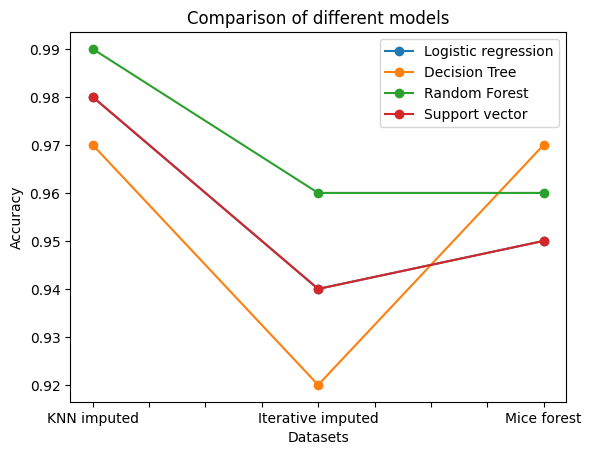

In [ ]:
plt.figure(figsize=(8,6))
accuracy_table.plot(kind='line',stacked=False,marker='o').tick_params(labelrotation=360)
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Comparison of different models")
plt.show()